# Non Linear Data.. Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('loan_analysis_summary.csv')
df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,3385,2997,19.728762,13692.311669,63511.205814,63511.205814,15.341982,2.472589,0.524415
1,510,7745,6767,19.749380,13861.323434,65471.300058,65471.300058,15.439957,5.582919,1.184089
2,520,9168,7813,20.052651,14199.157395,68391.296443,68391.296443,15.331814,6.445891,1.367118
3,530,10323,8672,20.223831,14501.266589,69136.251070,69136.251070,15.457357,7.154584,1.517426
4,540,11562,9475,20.730541,14782.768985,70258.732958,70258.732958,15.273070,7.817076,1.657935


In [7]:
df[['fico_score', 'loan_total']].corr('spearman')

# SPEARMAN CORR IS BETTER TO USE IF THERE IS A MONOTONIC RELATIONSHIP OR A ORDINAL ...
# HERE THERE IS NO RELATIONSHIP BECAUSE IT IS NEARER TO 0

,fico_score,loan_total
fico_score,1.000000,0.035779
loan_total,0.035779,1.000000


<AxesSubplot:xlabel='fico_score', ylabel='loan_total'>

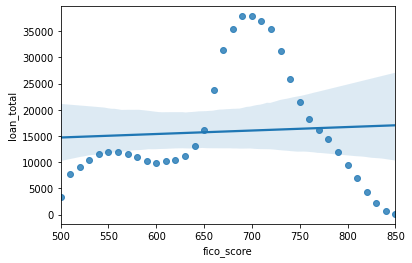

In [8]:
sns.regplot(x='fico_score', y='loan_total', data=df)

<img src="PolynomialFunctionsGraph.png">

## Just calculate the number of bends in the graph then just add +1 to it... to obtain the degree of polynomial

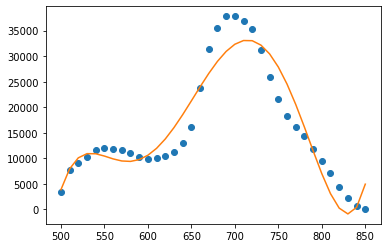

In [29]:
coeff = np.poly1d(np.polyfit(df['fico_score'], df['loan_total'], 5))
t = df['fico_score']
plt.plot(df['fico_score'], df['loan_total'], 'o', t, coeff(t), '-')
plt.show()

In [27]:
coeff

poly1d([ 5.61143271e-07, -1.86329755e-03,  2.44936735e+00, -1.59365961e+03,
        5.13453697e+05, -6.55586516e+07])

## Now visualizing "dti" vs "loan_total"

In [30]:
df[['dti', 'loan_total']].corr('spearman')

,dti,loan_total
dti,1.000000,0.038095
loan_total,0.038095,1.000000


<AxesSubplot:xlabel='dti', ylabel='loan_total'>

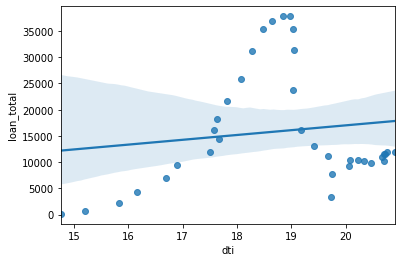

In [31]:
sns.regplot(x='dti', y='loan_total', data=df)

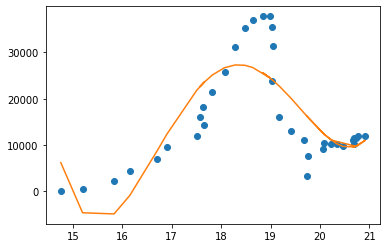

In [40]:
coeff = np.poly1d(np.polyfit(df['dti'], df['loan_total'], 4))
t = df['dti']
plt.plot(df['dti'], df['loan_total'], 'o', t, coeff(t), '-')
plt.show()

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [46]:
polynomial_features = PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(df[['dti']])

In [48]:
model = LinearRegression()
model.fit(x_poly, df['loan_total'])

LinearRegression()

In [49]:
y_pred=model.predict(x_poly)

In [50]:
model.coef_, model.intercept_

(array([ 0.00000000e+00, -1.40452079e+07,  1.17638860e+06, -4.34877861e+04,
         5.98888215e+02]),
 62442082.11878889)

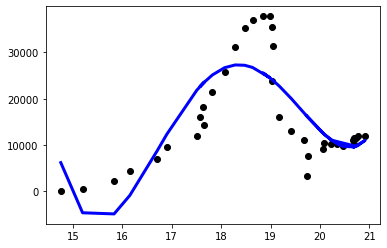

In [51]:
plt.scatter(df['dti'], df['loan_total'], color='black')
plt.plot(df['dti'], y_pred, color='blue', linewidth=3)

In [52]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

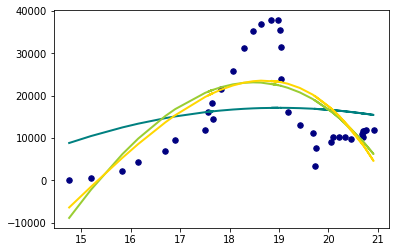

In [56]:
plt.scatter(df['dti'], df['loan_total'], color='navy', s=30, marker='o', label='training points')

colors = ['teal', 'yellowgreen', 'gold']
lw=2

for count, degree in enumerate([2,3,4]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(df[['dti']], df['loan_total'])
    y_plot = model.predict(df[['dti']])
    plt.plot(df['dti'], y_plot, color=colors[count], linewidth=lw, label="degree %d"%degree)
    